# Lab 1 - Data Visualization - 21KHDL

## VNU HCM - University of Science
---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Tran Nguyen Huan  | 21127050 |
| Nguyen Phat Dat   | 21127240 |

# 🚢 Titanic - 📊 Data Analytics

<img src= "https://img.freepik.com/free-vector/shipwreck-accident-ship-run-aground-sink-ocean_33099-2210.jpg?w=996&t=st=1659906434~exp=1659907034~hmac=c827b8572afc69ebb3bef97a68cb197ef3efcdc5c39b6f8857cb8f8245a19913" alt ="Titanic" style='width: 75%; margin-left: 12.5%
'>

# Dataset Description ⛳

Overview
The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

`The training set` should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

`The test set` should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include `gender_submission.csv`, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.


# About the given Datasets 📁📂

#### What is the meaning of each column?
There are total of __10__ columns in our dataset represent 10 features of each passenger, include:

| # | Field Name | Description |
|---|------------|-------------|
| 1 | `survival` | Indicates if the passenger survived the ship wreck |
| 2 | `pclass` | Indicates the socio-economic status of the given passanger (1st = Upper, 2nd = Middle, 3rd = Lower) |
| 3 | `sex` | Male or Female |
| 4 | `Age` | The age of the passenger |
| 5 | `sibsp` | The number of siblings / spouses of the passanger that are on-board |
| 6 | `parch` | The number of parents /  children that are on-board |
| 7 | `ticket` | Ticket number, which is the unique identifier of each passanger. |
| 8 | `fare` | How much the passanger has paid in total |
| 9 | `cabin` | How much the passanger has paid in total |
| 10 | `Embarked` | Which port the passanger embarked from (C = Cherbourg, Q = Queenstown, S = Southampton) |

# Table of Contents

1. [Import all the necessary libraries](#1.-Import-all-the-necessary-libraries)
2. [Basic Data Exploration](#2.-Basic-Data-Exploration)
3. [Numerical Feature Analysis](#3.-Numerical-Feature-Analysis)
   - 3.1 [Statistical Analysis](#3.1.-Statistical-Analysis)
   - 3.2 [Univariate Analysis](#3.2.-Univariate-Analysis)
4. [Categorical Feature Analysis](#4.-Categorical-Feature-Analysis)
5. [Numerical & Categorical Multivariate Analysis](#5.-Numerical-&-Categorical-Multivariate-Analysis)
6. [Insights](#6.-Insights)
7. [References](#7.-References)


### 1. Import necessary libraries

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
from termcolor import colored

sns.set(style="darkgrid", palette="muted", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

### 2. Basic Data Exploration

In [234]:
train_df = pd.read_csv('../data/train.csv')

#### How many rows and columns of our data?

In [235]:
print(f'The Training Dataset contains, Rows: {train_df.shape[0]} & Columns: {train_df.shape[1]}')

The Training Dataset contains, Rows: 891 & Columns: 12


#### Basic Information about the training dataset

In [236]:
# basic information about the training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Check first 5 entries of the dataset

In [237]:
# Check first 5 entries of the dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Identifying duplicate values

In [238]:
train_df.duplicated().sum()

0

#### Identifying missing values

In [239]:
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [240]:
# 1. Set variables for total amount of cells and total amount of missing data
total_missing = missing_values.sum()

# 2. Calculating percent of data that is missing
percent_missing = (total_missing/np.product(train_df.shape)) * 100

print("Total missing values: {}  =  {:.2f} %".format(total_missing, percent_missing))

Total missing values: 866  =  8.10 %


In [241]:
number_missing = train_df.isnull().sum().sort_values(ascending=False)
pct_column = (train_df.isnull().sum() / len(train_df) * 100).round(2).astype('str')+' %'
pct_total = (train_df.isnull().sum()/train_df.isna().sum().sum()*100).round(2).astype('str')+' %'
missing_values = pd.concat([number_missing, pct_column, pct_total], axis=1, keys=['Number_Missing_Values', 'PCT_Missing_in_Column','PCT_of_all_Missing'])
   
print('\nMISSING VALUES IN',train_df.shape[0],'ROWS:')    
all_missing = missing_values.loc[missing_values['Number_Missing_Values'] > 0]
all_missing


MISSING VALUES IN 891 ROWS:


,Number_Missing_Values,PCT_Missing_in_Column,PCT_of_all_Missing
Cabin,687,77.1 %,79.33 %
Age,177,19.87 %,20.44 %
Embarked,2,0.22 %,0.23 %


#### Dealing with missing values

Only two values are missing in the `Embarked` column. Let's check the corresponding rows.

In [242]:
train_df[pd.isnull(train_df.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [243]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

As only two values are missing (`0.22%`), I decided to replace them by the most listed value.

In [244]:
train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [245]:
train_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

As most of the data in the column `Cabin` is missing (`687` out of `891` values --> `77%`), and I do not need the column for my analysis I deciced to delete the column - deleting the rows would remove 687 useful rows.

In [246]:
train_df.drop("Cabin", axis=1, inplace=True)

In [247]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [248]:
train_df.Age.describe().to_frame()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


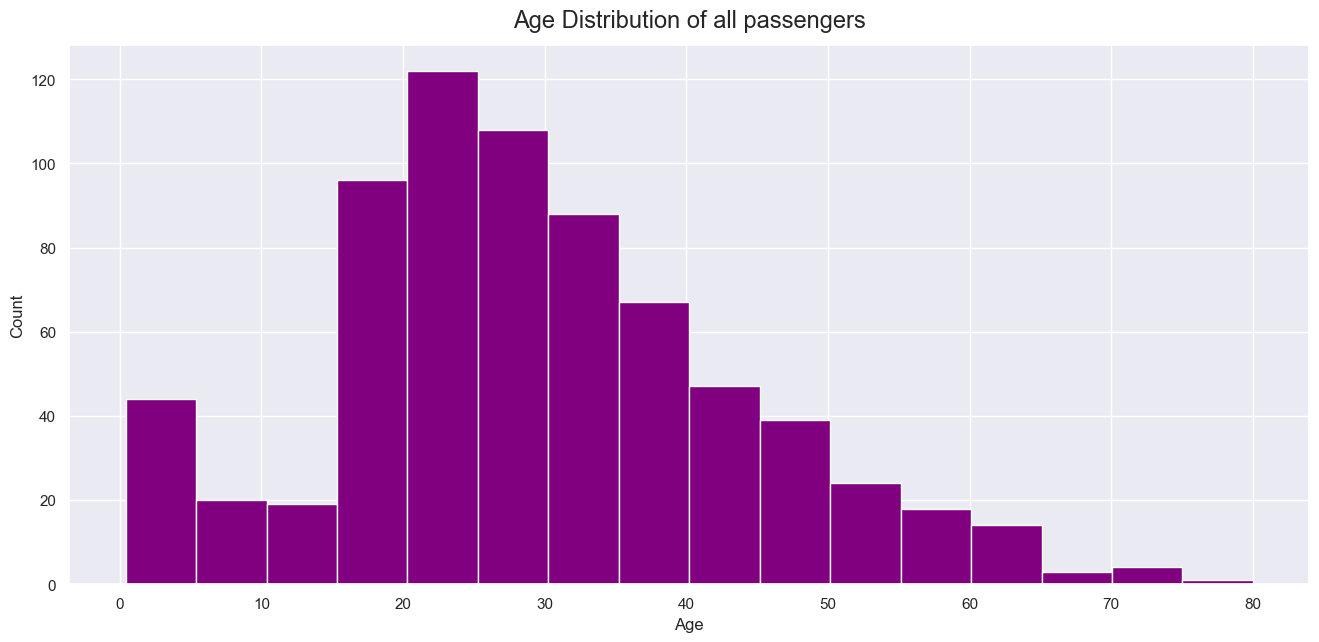

In [249]:
train_df['Age'].hist(bins=16, color='purple' ,figsize=(16,7))
plt.title('Age Distribution of all passengers', size=17, pad=13)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

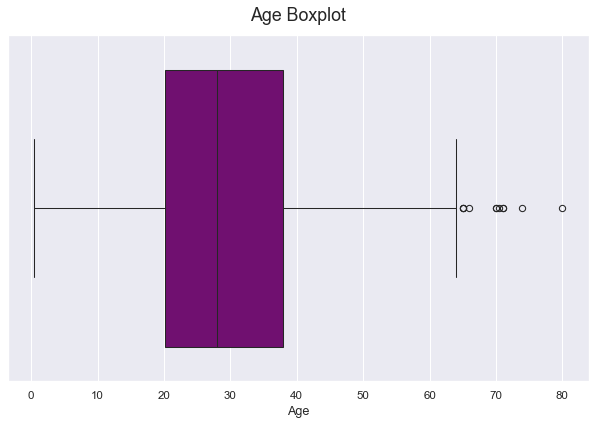

In [250]:
plt.figure(figsize=(10,6), dpi=75)
sns.boxplot(x="Age", data=train_df, color='purple')
plt.title('Age Boxplot', size=17, pad=13)
plt.show()

In [251]:
# Mean age vs. median
display(train_df.Age.mean())
display(train_df.Age.median())

29.69911764705882

28.0

`The average age` of all people on board is `29.7`. `The middle value` is `28`. Replacing the missing values with the mean or the median would be inacurate. I would like to find out the average age of men and women in each class and check if there is a difference and if there might be further correlations.

In [252]:
grouped_sex_age = train_df.groupby(['Sex']).Age.agg([len, min, max, 'mean', 'median'])
grouped_sex_age

,len,min,max,mean,median
Sex,,,,,
female,314,0.75,63.0,27.915709,27.0
male,577,0.42,80.0,30.726645,29.0


In [253]:
grouped_class_age = train_df.groupby(['Pclass']).Age.agg([len, min, max, 'mean', 'median'])
grouped_class_age

,len,min,max,mean,median
Pclass,,,,,
1,216,0.92,80.0,38.233441,37.0
2,184,0.67,70.0,29.877630,29.0
3,491,0.42,74.0,25.140620,24.0


As the average age seem to depend on both, sex and class.

In [254]:
# Checking the (aveage) age and amount of people for each class and sex
grouped_sex_pclass_age = train_df.groupby(['Sex', 'Pclass']).Age.agg([len, min, max, 'mean', 'median'])
grouped_sex_pclass_age

len   min   max       mean  median
Sex    Pclass                                    
female 1        94  2.00  63.0  34.611765    35.0
       2        76  2.00  57.0  28.722973    28.0
       3       144  0.75  63.0  21.750000    21.5
male   1       122  0.92  80.0  41.281386    40.0
       2       108  0.67  70.0  30.740707    30.0
       3       347  0.42  74.0  26.507589    25.0

The average age in each `class` and `sex` is very different. There also seems to be a correlation between `Age` and `SibSp`. In my opinion this needs to be considered when replacing the missing values.

In [255]:
grouped_sex_pclass_age = train_df.groupby(['Pclass', 'SibSp']).Age.agg([len, min, max, 'mean', 'median'])
grouped_sex_pclass_age

len    min   max       mean  median
Pclass SibSp                                     
1      0      137   4.00  80.0  39.181416    37.0
       1       71   0.92  70.0  37.414154    38.0
       2        5  18.00  53.0  37.200000    44.0
       3        3  19.00  24.0  22.000000    23.0
2      0      120   0.83  70.0  31.934220    30.0
       1       55   0.67  60.0  27.363636    29.0
       2        8   1.00  32.0  19.125000    23.5
       3        1  30.00  30.0  30.000000    30.0
3      0      351   0.42  74.0  27.630201    26.0
       1       83   1.00  48.0  24.912698    25.0
       2       15   0.75  41.0  18.875000    19.5
       3       12   2.00  33.0   8.875000     6.0
       4       18   1.00  17.0   7.055556     6.5
       5        5   1.00  16.0  10.200000    11.0
       8        7    NaN   NaN        NaN     NaN

In [256]:
fem_p1_s0 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 1) & (train_df.SibSp == 0)].Age.median()
fem_p1_s1 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 1) & (train_df.SibSp == 1)].Age.median()
fem_p1_s2 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 1) & (train_df.SibSp == 2)].Age.median()
fem_p1_s3 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 1) & (train_df.SibSp == 3)].Age.median()
fem_p2_s0 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 2) & (train_df.SibSp == 0)].Age.median()
fem_p2_s1 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 2) & (train_df.SibSp == 1)].Age.median()
fem_p2_s2 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 2) & (train_df.SibSp == 2)].Age.median()
fem_p2_s3 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 2) & (train_df.SibSp == 3)].Age.median()
fem_p3_s0 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 3) & (train_df.SibSp == 0)].Age.median()
fem_p3_s1 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 3) & (train_df.SibSp == 1)].Age.median()
fem_p3_s2 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 3) & (train_df.SibSp == 2)].Age.median()
fem_p3_s3 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 3) & (train_df.SibSp == 3)].Age.median()
fem_p3_s4 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 3) & (train_df.SibSp == 4)].Age.median()
fem_p3_s5 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 3) & (train_df.SibSp == 5)].Age.median()
fem_p3_s8 =train_df.loc[(train_df.Sex == 'female') & (train_df.Pclass == 3) & (train_df.SibSp == 8)].Age.median()
male_p1_s0 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 1) & (train_df.SibSp == 0)].Age.median()
male_p1_s1 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 1) & (train_df.SibSp == 1)].Age.median()
male_p1_s2 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 1) & (train_df.SibSp == 2)].Age.median()
male_p1_s3 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 1) & (train_df.SibSp == 3)].Age.median()
male_p2_s0 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 2) & (train_df.SibSp == 0)].Age.median()
male_p2_s1 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 2) & (train_df.SibSp == 1)].Age.median()
male_p2_s2 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 2) & (train_df.SibSp == 2)].Age.median()
male_p3_s0 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 3) & (train_df.SibSp == 0)].Age.median()
male_p3_s1 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 3) & (train_df.SibSp == 1)].Age.median()
male_p3_s2 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 3) & (train_df.SibSp == 2)].Age.median()
male_p3_s3 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 3) & (train_df.SibSp == 3)].Age.median()
male_p3_s4 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 3) & (train_df.SibSp == 4)].Age.median()
male_p3_s5 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 3) & (train_df.SibSp == 5)].Age.median()
male_p3_s6 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 3) & (train_df.SibSp == 6)].Age.median()
male_p3_s8 =train_df.loc[(train_df.Sex == 'male') & (train_df.Pclass == 3) & (train_df.SibSp == 8)].Age.median()

#### Filling missing values with average age follow by `sex`, `pclass` and `sibsp`

In [257]:
# Filling missing values with average age follow by sex, pclass and sibsp
def fill_missing_age(age, pclass, sex, sibsp):
    if pd.isnull(age):
        if sex == 'female':
            if pclass == 1:
                if sibsp == 0:
                    return fem_p1_s0
                elif sibsp == 1:
                    return fem_p1_s1
                elif sibsp == 2:
                    return fem_p1_s2
                elif sibsp == 3:
                    return fem_p1_s3
            elif pclass == 2:
                if sibsp == 0:
                    return fem_p2_s0
                elif sibsp == 1:
                    return fem_p2_s1
                elif sibsp == 2:
                    return fem_p2_s2
                elif sibsp == 3:
                    return fem_p2_s3
            elif pclass == 3:
                if sibsp == 0:
                    return fem_p3_s0
                elif sibsp == 1:
                    return fem_p3_s1
                elif sibsp == 2:
                    return fem_p3_s2
                elif sibsp == 3:
                    return fem_p3_s3
                elif sibsp == 4:
                    return fem_p3_s4
                elif sibsp == 5:
                    return fem_p3_s5
                elif sibsp == 8:
                    return train_df.Age.median()
        elif sex == 'male':
            if pclass == 1:
                if sibsp == 0:
                    return male_p1_s0
                elif sibsp == 1:
                    return male_p1_s1
                elif sibsp == 2:
                    return male_p1_s2
                elif sibsp == 3:
                    return male_p1_s3
            elif pclass == 2:
                if sibsp == 0:
                    return male_p2_s0
                elif sibsp == 1:
                    return male_p2_s1
                elif sibsp == 2:
                    return male_p2_s2
            elif pclass == 3:
                if sibsp == 0:
                    return male_p3_s0
                elif sibsp == 1:
                    return male_p3_s1
                elif sibsp == 2:
                    return male_p3_s2
                elif sibsp == 3:
                    return male_p3_s3
                elif sibsp == 4:
                    return male_p3_s4
                elif sibsp == 5:
                    return male_p3_s5
                elif sibsp == 6:
                    return male_p3_s6
                elif sibsp == 8:
                    return train_df.Age.median()
    return age

In [258]:
train_df['Age'] = train_df.apply(lambda x: fill_missing_age(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

In [259]:
train_df.Age.isnull().sum()

0

In [260]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 3. Numerical Features Analysis

In [261]:
# create a list of all numercial features
numeric_features = train_df.select_dtypes(exclude=['object']).columns
numeric_features

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [262]:
# create the dataframe of all numerical features
numeric_train_df = train_df[numeric_features]

#### 3.1 Statistical Analysis

In [263]:
numeric_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.338575,13.315562,0.42,22.0000,27.0000,36.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Heatmap

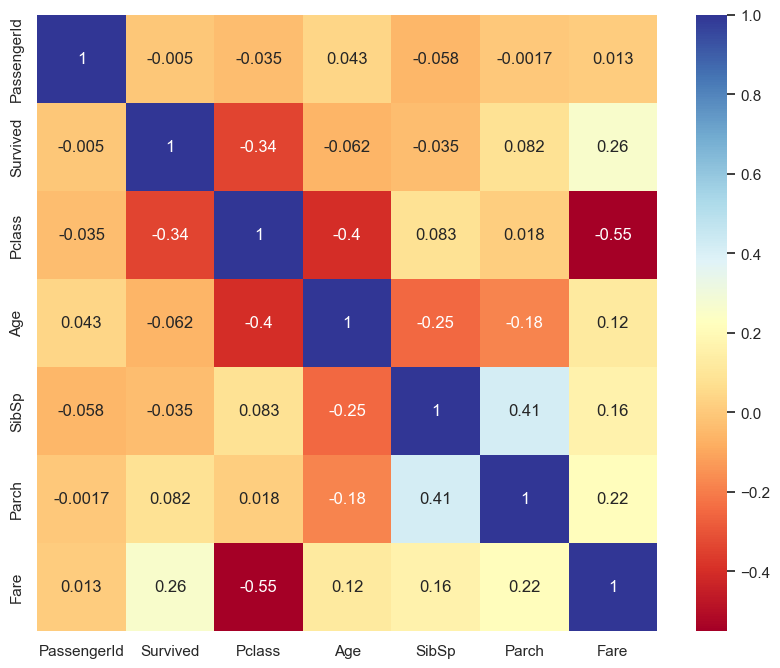

In [264]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_train_df.corr(), annot=True, cmap='RdYlBu');

In [265]:
numeric_features_correlation_train_df = pd.DataFrame(numeric_train_df.corr().Survived)
abs(numeric_features_correlation_train_df).sort_values(by='Survived', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.062104
SibSp,0.035322
PassengerId,0.005007


**Comment:** 
- `Pclass` or Passenger Class" is the numerical feature that is most strongly correlated with the `Survived` attribute compared to other numerical features.
- The `Pclass/Passenger Class` and `Fare"` features exhibit a significant negative correlation value (`-0.55`), which aligns with our expectations.
- `SibSp` and `Parch`, these two features, show a significant positive correlation value (0.41).
- The `PassengerId` feature does not exhibit any meaningful correlation with any other features.

#### 3.2 Univariate Analysis

##### Survived (Target Attribute)

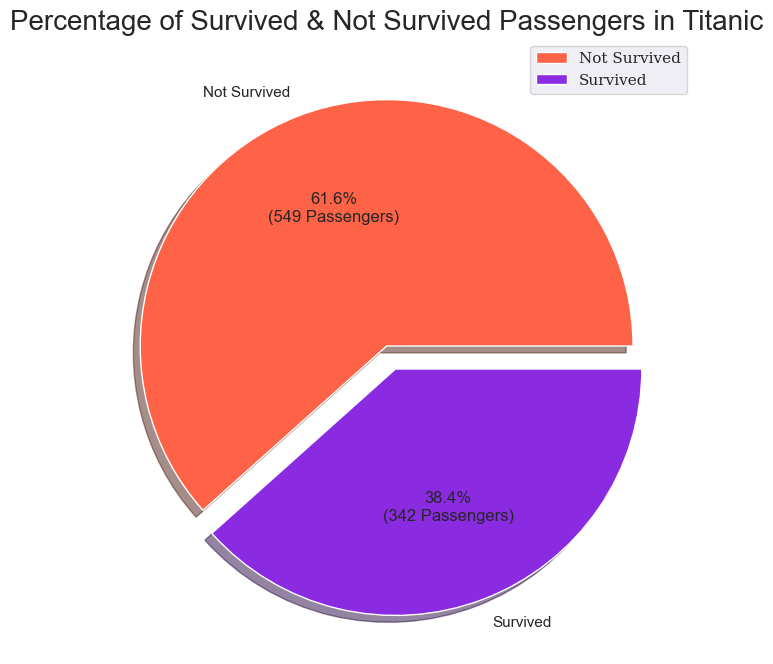

In [266]:
size = list(numeric_train_df['Survived'].value_counts())
labels = ['Not Survived', 'Survived']
colors = ['tomato', 'blueviolet']
explode = [0, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of Survived & Not Survived Passengers in Titanic', fontsize = 20)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.legend()
plt.show()

**Comment:** 
- From the above figure, we can observe that the majority of the passengers (`61.6%`) on the Titanic did `not survive`.
- Only `38.4%` of passengers were able to `survive`.

##### Pclass or Passesnger Class

**Question**: 
>**What is the distribution of passengers across different fare classes on the Titanic, and how does it vary?** 

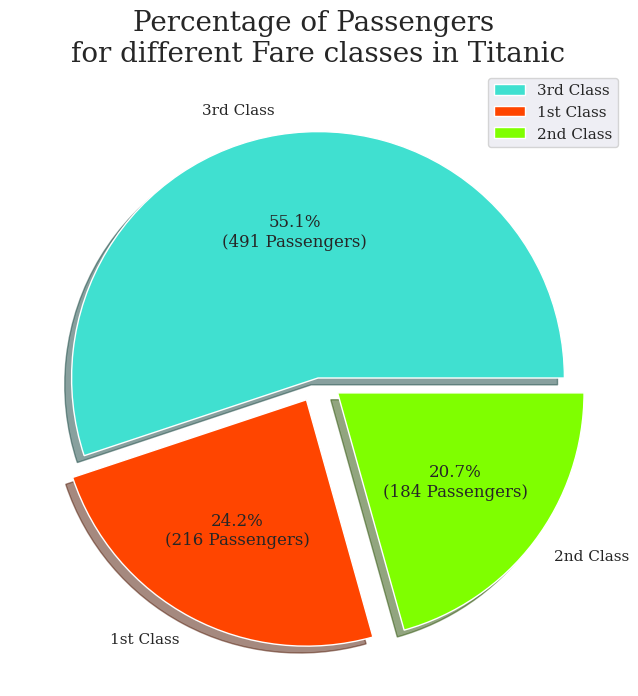

In [267]:
size = list(numeric_train_df['Pclass'].value_counts())
labels = ['3rd Class', '1st Class', '2nd Class']
colors = ['turquoise', 'orangered', 'chartreuse']
explode = [0, 0.1, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of Passengers \nfor different Fare classes in Titanic', fontsize = 20)
plt.legend()
plt.show()

**Comment:** 
- We can see that most of the passengers (`55.1%`) on the Titanic were traveling in Economy (`3rd`) Class.
- `24.2%` and `20.7%` of passengers on the Titanic were traveling in Premium (`1st`) and Middle (`2nd`) Class respectively.

Let's define `bar_plot`, creates  a bar plot to visualize the distribution of categorical data. It allow for comparison between different categories or groups.

In [268]:
def bar_plot(attribute, data, color, title, size, space, comparison = None, comparison_order=None):
    plt.figure(figsize=size)
    if comparison == None:
        ax = sns.countplot(x = attribute, data = data, palette=color)
    else:
        ax = sns.countplot(x = attribute, hue = comparison, hue_order=comparison_order, data = data, palette=color)
    total = len(data)
    
    for i in ax.patches:
        percentage = ' '*space + '{:.2f}%'.format((i.get_height()/total)*100)
        x = i.get_x()
        y = i.get_height()
        ax.annotate(percentage, (x,y))
    plt.title(title, size = 20)


**Question**: 
>**How does the distribution of passengers across different fare classes vary based on their survival status?** 

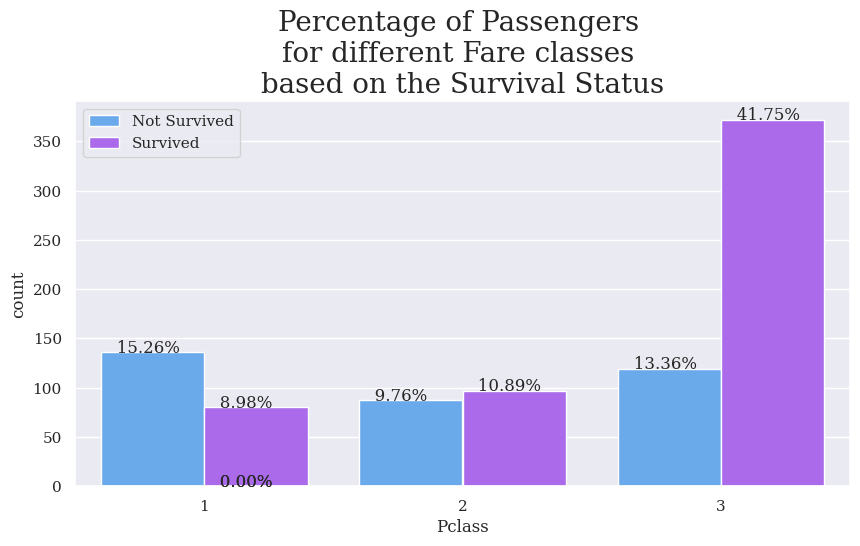

In [269]:
new_numeric_train_df = numeric_train_df
new_numeric_train_df['Survived'] = new_numeric_train_df['Survived'].astype(str)
bar_plot('Pclass', new_numeric_train_df, 'cool', 
         "Percentage of Passengers \nfor different Fare classes \nbased on the Survival Status", 
         (10, 5), 3, 'Survived')

plt.legend(loc='upper left', labels=['Not Survived', 'Survived']);

**Comment:** 
- From the above figure, it is inferred that the majority of the passengers (`41.75%`) who were traveling in Economy (`3rd`) Class on the Titanic were `not able to survive`.

**Question**: 
>**How does the survival rate vary across different passenger classes on the Titanic?** 

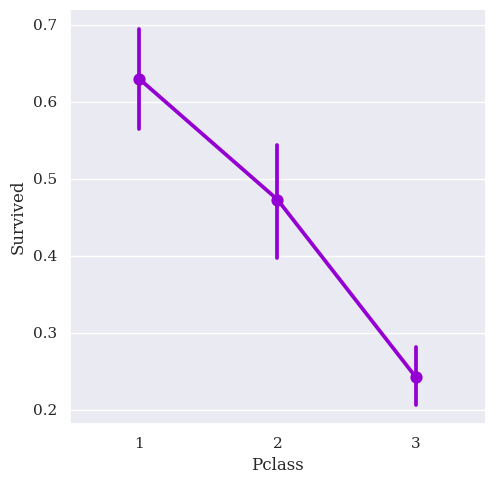

In [270]:
numeric_train_df['Survived'] = pd.to_numeric(numeric_train_df['Survived'], errors='coerce')
sns.catplot(x='Pclass', y='Survived', data=numeric_train_df, kind='point', color='darkviolet');

**Comment:** 
- The survival rate of Premium (`1st`) Class passengers is higher than the survival rate of passengers in the other two passenger classes.
- The passengers of Economy (`3rd`) Class had the lowest survival rate.

##### Fare

**Question**: 
>**How does the fare distribution differ between passengers who survived and those who did not on the Titanic?** 

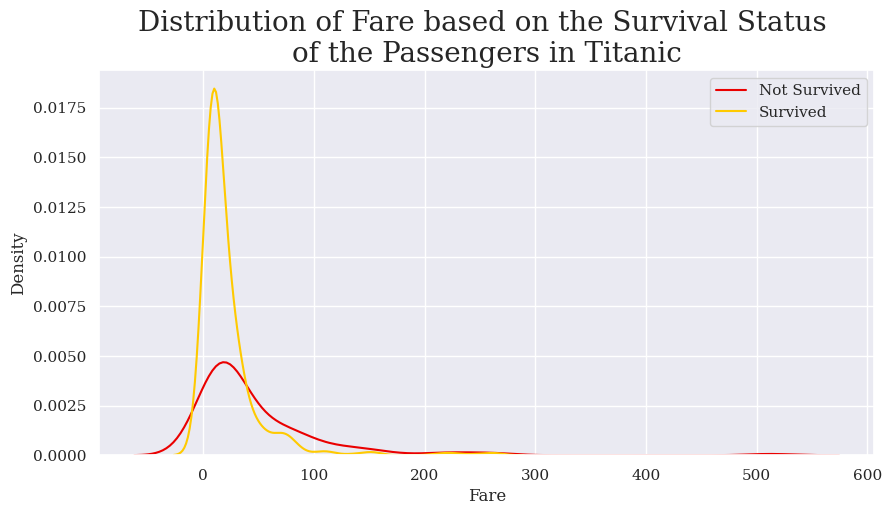

In [271]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=numeric_train_df, x='Fare', hue='Survived', palette="hot_r");
plt.title("Distribution of Fare based on the Survival Status \nof the Passengers in Titanic", fontsize = 20);

plt.legend(loc='upper right', labels=['Not Survived', 'Survived']);

**Comment:** 
- The Survival episode has a fare split that `focuses` primarily on the `$20 to $30` range
- Not Survival episodes tend to be `spread` across all fare, but mostly fall in the `$25 to $30` range.

**Question**: 
>**What is the average fare paid by passengers in each class on the Titanic, and how does it differ across different classes?** 

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


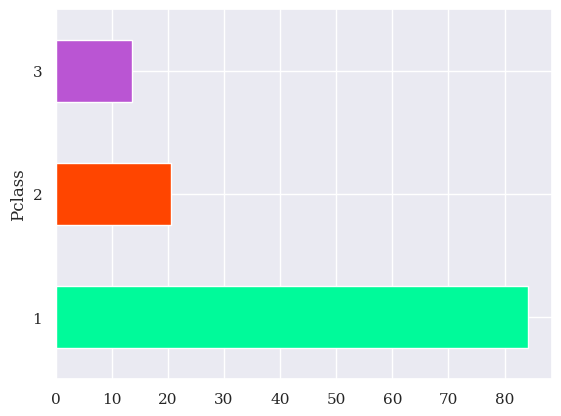

In [272]:
print(numeric_train_df.groupby('Pclass')['Fare'].mean())
numeric_train_df.groupby('Pclass')['Fare'].mean().plot.barh(color=['mediumspringgreen', 'orangered', 'mediumorchid']);

**Comment:** 
- It can be seen that the average ticket price of passengers in `Premium` class is superior to the other 2 ticket classes. 
- We see that there is no significant difference between the remaining two ticket classes.

##### Age

**Question**: 
>**How does the age distribution differ between passengers who survived and those who did not on the Titanic, and what are the descriptive statistics for age within each survival group?** 

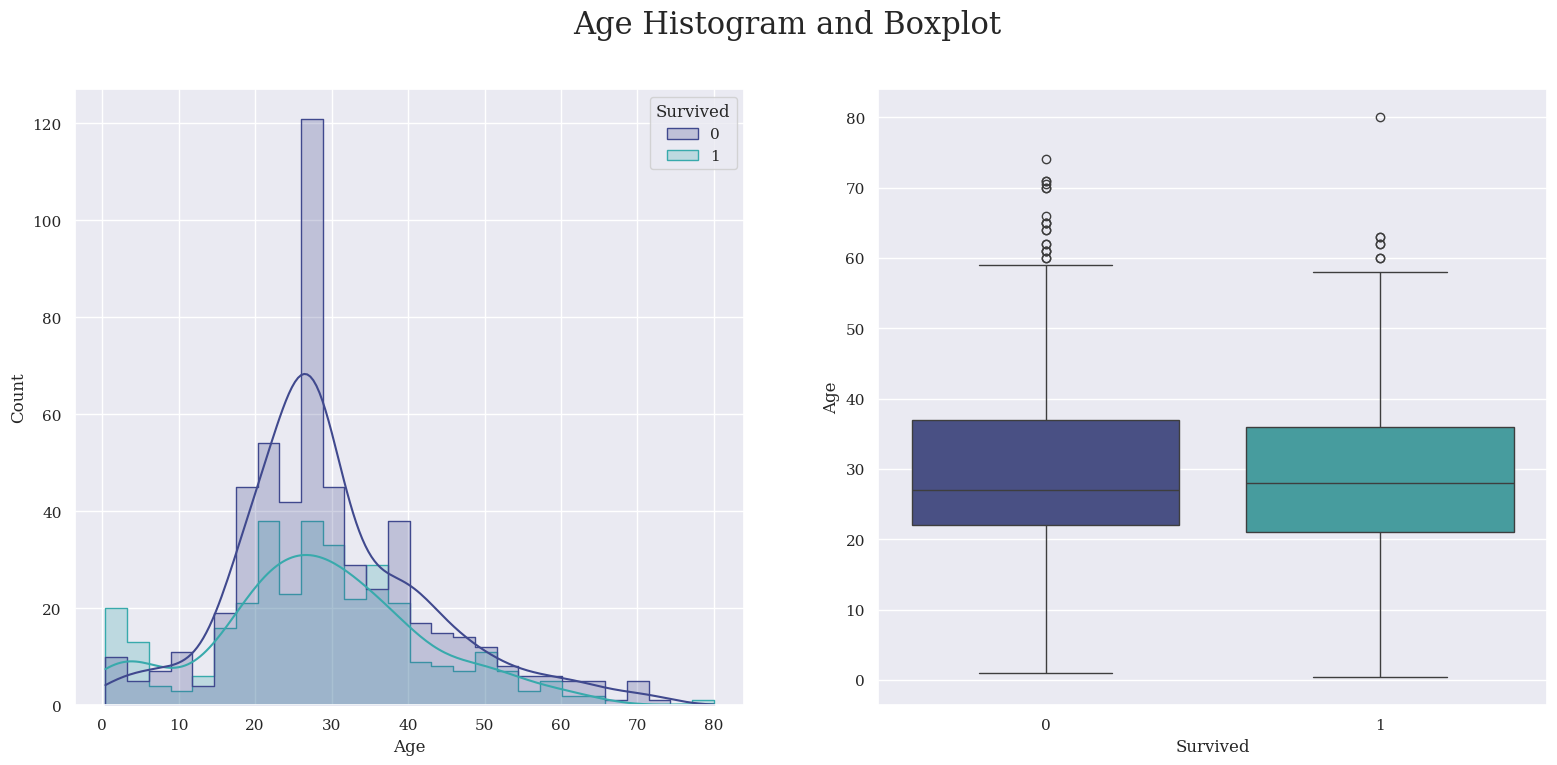

Age Min, Mean and Max:
	Survived == 1
	Age Minimum:  0.42
	Age Mean: 28.29143274853801
	Age Maximum: 80.0 

	Survived == 0
	Age Minimum:  1.0
	Age Mean: 29.99089253187614
	Age Maximum: 74.0


In [273]:
train_df['Survived'] = train_df['Survived'].astype('int')
fig, ax = plt.subplots(1, 2, figsize=(19,8))
fig.suptitle('Age Histogram and Boxplot', size=22)
sns.histplot(x='Age', data=train_df, hue='Survived', palette='mako', kde=True, element='step', ax=ax[0])
sns.boxplot(x='Survived', y='Age', data=train_df, palette='mako', ax=ax[1])
plt.show()

print(colored("Age Min, Mean and Max:", 'green', attrs=['underline', 'bold']))

survived_1 = train_df[train_df['Survived']==1]['Age']
survived_0 = train_df[train_df['Survived']==0]['Age']

print(colored("\tSurvived == 1", 'magenta', attrs=['bold']))
print('\tAge Minimum: ', colored(survived_1.describe()['min'], "cyan", attrs=['bold']))
print('\tAge Mean:', colored(survived_1.describe()['mean'], "cyan", attrs=['bold']))
print('\tAge Maximum:', colored(survived_1.describe()['max'], "cyan", attrs=['bold']), '\n')

print(colored("\tSurvived == 0", 'magenta', attrs=['bold']))
print('\tAge Minimum: ', colored(survived_0.describe()['min'], "cyan", attrs=['bold']))
print('\tAge Mean:', colored(survived_0.describe()['mean'], "cyan", attrs=['bold']))
print('\tAge Maximum:', colored(survived_0.describe()['max'], "cyan", attrs=['bold']))

**Comment:** 
- It can be seen that the average ticket price of passengers in `Premium` class is superior to the other 2 ticket classes. 
- We see that there is no significant difference between the remaining two ticket classes.

### 4. Categorical Feature Analysis

##### Sex

In this section we need to creates a `horizontal bar plot` to visualize the distribution of a categorical feature in a DataFrame. It allows for optional differentiation by a hue category. 

In [274]:
def horizontal_bar_plot(feature, dataframe, color, title, adjust, figsize, hue=None):
  # Create barplot 
  plt.figure(figsize=figsize)

  if hue == None:
    ax = sns.countplot(y=feature, data=dataframe, palette=color)
  else:
    ax = sns.countplot(y=feature, data=dataframe, palette=color, hue=hue)

  # Annotate every single Bar with its value, based on it's width           
  for p in ax.patches:
      width = p.get_width()
      plt.text(p.get_width()+adjust[0], p.get_y()+adjust[1]*p.get_height(),
              '{} Passesngers\n[{:.2f}%]'.format(int(width), width*100/train_df[feature].shape[0]),
              ha='center', va='center')
      
  plt.title(title, fontsize=23);

**Question**: 
>**What is the distribution of passengers by sex on the Titanic, and how many male and female passengers are there in the dataset?** 

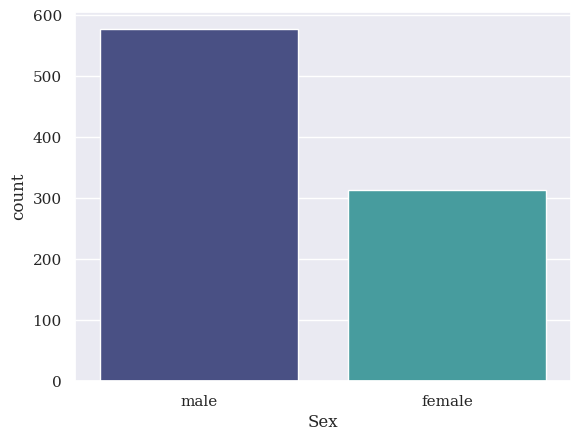

PASSENGER CLASS COUNTS:

Male Passengers: 577 

Female Passengers: 314 



In [275]:
sns.countplot(x='Sex', data=train_df, palette='mako')
plt.show()
print(colored("PASSENGER CLASS COUNTS:\n", 'magenta', attrs=['bold', 'underline']))
print(colored(f"Male Passengers: {train_df[train_df['Sex']=='male'].count()[0]}", "cyan", attrs=['bold']),'\n')
print(colored(f"Female Passengers: {train_df[train_df['Sex']=='female'].count()[0]}", "cyan", attrs=['bold']),'\n')

##### Male and Female Survival count

**Question**: 
>**How does the count of passengers who survived and did not survive vary based on sex on the Titanic, and what are the specific counts for male and female passengers in each survival category?** 

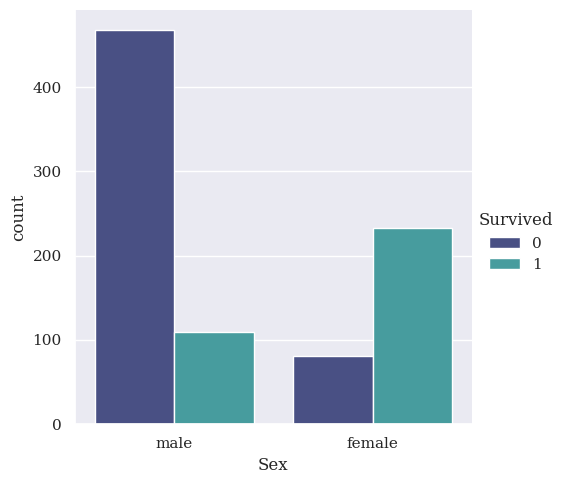

PASSENGER CLASS SURVIVED BASED ON SEX:

SURVIVED 

Male Passengers: 109 

Female Passengers: 233 

DIDN'T SURVIVE 

Male Passengers: 468 

Second Class Passengers: 81 



In [276]:
train_df['Survived'] = train_df['Survived'].astype('str')
sns.catplot(x="Sex",  kind="count", hue='Survived', data=train_df, palette='mako')
plt.show()
SURVIVED_SEX_LIST = train_df.value_counts(["Sex", "Survived"], sort=False).to_numpy()
print(colored("PASSENGER CLASS SURVIVED BASED ON SEX:\n", 'magenta', attrs=['bold', 'underline']))
# Passengers that survived
print(colored(f"SURVIVED", "green", attrs=['bold']),'\n')
print(colored(f"Male Passengers: {SURVIVED_SEX_LIST[3]}", "cyan", attrs=['bold']),'\n')
print(colored(f"Female Passengers: {SURVIVED_SEX_LIST[1]}", "cyan", attrs=['bold']),'\n')
# Passengers that didn't survive
print(colored(f"DIDN'T SURVIVE", "red", attrs=['bold']),'\n')
print(colored(f"Male Passengers: {SURVIVED_SEX_LIST[2]}", "cyan", attrs=['bold']),'\n')
print(colored(f"Second Class Passengers: {SURVIVED_SEX_LIST[0]}", "cyan", attrs=['bold']),'\n')

**Comment (from 2 above chart related `sex`):** 
- The number of women who survive is more than double that of men
- And men has a death rate 4 times higher than women. Shows that women often have a higher chance of survival than men.

### 5. Numerical & Categorical Multivariate Analysis

##### Embarked-Pclass-Sex-Survived

**Question**: 
>**What is the relationship between the port of embarkation, passenger class, and survival rate based on gender aboard the Titanic, and how does this relationship vary across different embarkation ports and passenger classes?**

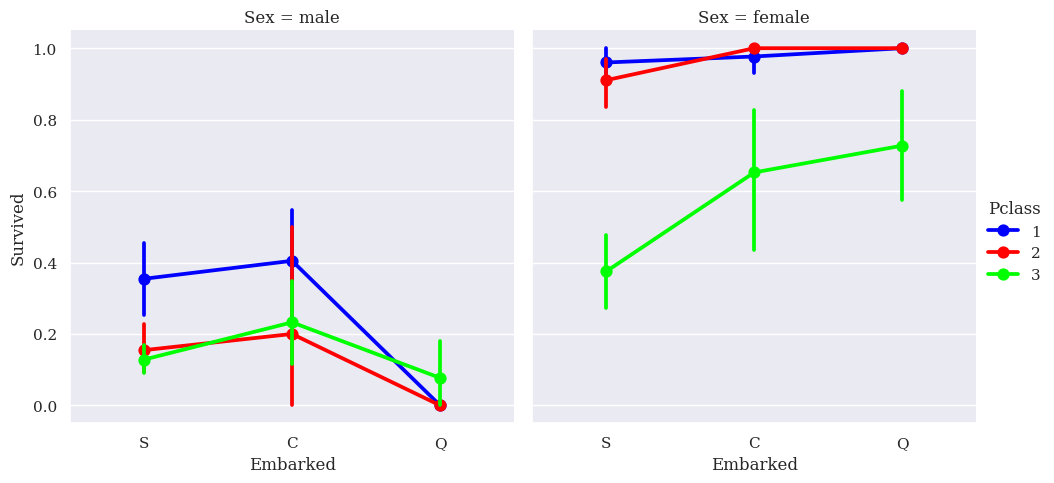

In [277]:
train_df['Survived'] = pd.to_numeric(train_df['Survived'], errors='coerce')
sns.catplot(x="Embarked", y='Survived', hue="Pclass", col="Sex", data=train_df, kind="point", palette='brg');

**Comment:** 
- The `female` passengers who embarked from `Cherbourg` Port and belonged to the Premium (`1st`) Class on the Titanic had the highest survival rate.
- The male passengers who embarked from `Queenstown` Port and belonged to Economy (`3rd`) Class on the Titanic had the least survival rate."

##### Age-Embarked-Pclass-Sex-Survived

**Question**: 
>**What is the relationship between age, survival rate, and passenger class among male and female passengers aboard the Titanic, and how does this relationship vary across different age groups and passenger classes?** 

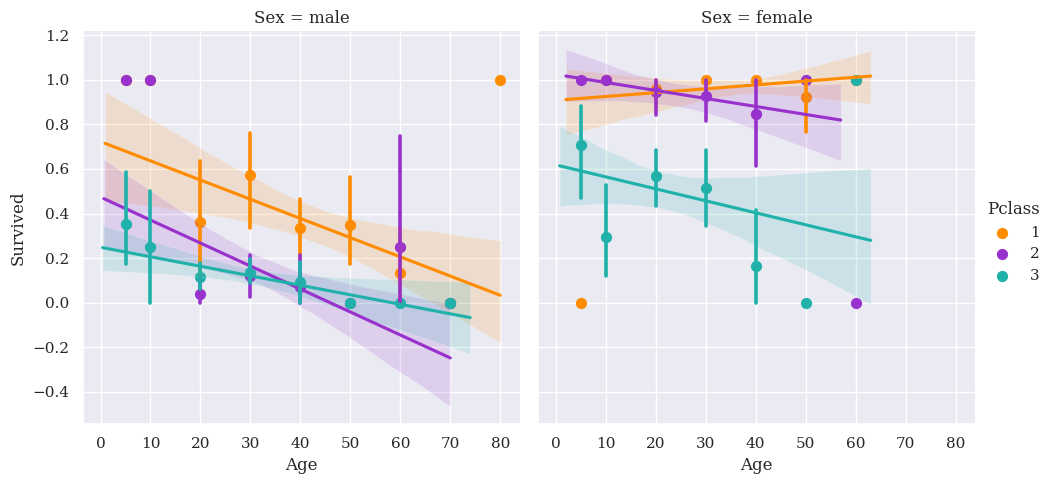

In [278]:
generations = [5, 10, 20, 30, 40, 50, 60, 70 , 80]
sns.lmplot(x="Age", y="Survived",
            hue="Pclass", col="Sex",
            data=train_df,
            palette=["darkorange","darkorchid","lightseagreen"], x_bins=generations);

**Comments**: 
- As the age increases, passenger's survival rate also decreases for all kinds of passengers except for the female passengers of premium (`1st`) class.
- The females, males, and children of premium (`1st`) class had higher survival rates than other classes.
- In economy (`3rd`) class, more children had survived.
- The old-age female passengers of premium (`1st`) class had the highest survival rate.
- The old-age male passengers of economy (`3rd`) class had the least survival rate.

### 6. Insights

After analyzing this titanic dataset, here are some insight should be interesting:

1. `Pclass` or Passenger Class" is the numerical feature that is most strongly correlated with the `Survived` attribute compared to other numerical features. 

2. Majority of the passengers (`61.6%`) on the Titanic did `not survive`. Only `38.4%` of passengers were able to `survive`.

3. Most of the passengers (`55.1%`) on the Titanic were traveling in Economy (`3rd`) Class. `24.2%` and `20.7%` of passengers on the Titanic were traveling in Premium (`1st`) and Middle (`2nd`) Class respectively

4. Majority of the passengers (`41.75%`) who were traveling in Economy (`3rd`) Class on the Titanic were `not able to survive`

5. The survival rate of Premium (`1st`) Class passengers is higher than the survival rate of passengers in the other two passenger classes.

6. The Survival episode has a fare split that `focuses` primarily on the `$20 to $30` range. Not Survival episodes tend to be `spread` across all fare, but mostly fall in the `$25 to $30` range.

7. It can be seen that the average ticket price of passengers in `Premium` class is superior to the other 2 ticket classes. We see that there is no significant difference between the remaining two ticket classes.

8. It can be seen that the average ticket price of passengers in `Premium` class is superior to the other 2 ticket classes. We see that there is no significant difference between the remaining two ticket classes

9. The number of women who survive is more than double that of men. And men has a death rate 4 times higher than women. Shows that women often have a higher chance of survival than men.

10. The `female` passengers who embarked from `Cherbourg` Port and belonged to the Premium (`1st`) Class on the Titanic had the highest survival rate. The `male` passengers who embarked from `Queenstown` Port and belonged to Economy (`3rd`) Class on the Titanic had the least survival rate.

11. As the age increases, passenger's survival rate also decreases for all kinds of passengers except for the female passengers of premium (`1st`) class.

12.  The females, males, and children of premium (`1st`) class had higher survival rates than other classes

13. In economy (`3rd`) class, more children had survived.

14. The old-age female passengers of premium (`1st`) class had the highest survival rate.

15. The old-age male passengers of economy (`3rd`) class had the least survival rate

### 7. References

[1] [Titanic dataset source kaggle](https://www.kaggle.com/competitions/titanic)

[2] https://www.kaggle.com/code/petraneumann/data-analysis-titanic-data-python

[3] https://www.kaggle.com/code/alexisbcook/titanic-tutorial

[4] https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

[5] [Storytelling with data book](https://github.com/Saurav6789/Books-/blob/master/storytelling-with-data-cole-nussbaumer-knaflic.ptrain_df)

---
## <center>THE END</center>

## <center>THANK YOU</center>